<a href="https://colab.research.google.com/github/sonudoo/DSA/blob/master/Machine%20Learning/FashionMNISTUsingCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/fashion-mnist_train.csv')

In [0]:
data = data.values

In [0]:
X = data[:,1:]
Y = data[:,0]

In [0]:
m = X.shape[0]
Y = Y.reshape((1, m))

In [0]:
X = X.reshape((m, 28, 28 ,1))

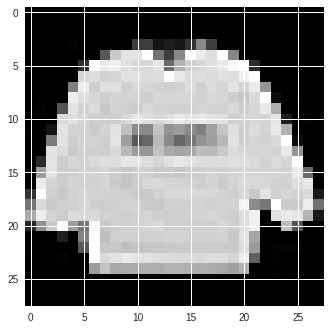

In [0]:
import matplotlib.pyplot as plt
plt.imshow(X[0].reshape(28,28), cmap='gray')


In [0]:
import numpy as np
Y = np.eye(10)[Y][0]

In [0]:
classifier = Sequential()
classifier.add(Conv2D(64, (2, 2), input_shape=(28, 28, 1), padding='same', activation='relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(32, (2, 2), activation='relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())

In [0]:
classifier.add(Dense(units=256, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=10, kernel_initializer='uniform', activation='softmax'))

In [0]:
classifier.compile(optimizer='adam', loss='binary_crossentropy')

In [0]:
classifier.fit(X/255, Y, batch_size=64, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 78s 1ms/step - loss: 0.0831
Epoch 2/10
60000/60000 [==============================] - 78s 1ms/step - loss: 0.0592
Epoch 3/10
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0512
Epoch 4/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0464
Epoch 5/10
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0420
Epoch 6/10
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0383
Epoch 7/10
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0350
Epoch 8/10
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0321
Epoch 9/10
60000/60000 [==============================] - 78s 1ms/step - loss: 0.0289
Epoch 10/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0264


In [0]:
Y_hat = classifier.predict(X)

In [0]:
print('Training Accuracy: '+str(np.sum(np.argmax(Y, axis=1) == np.argmax(Y_hat, axis=1))/m))

Training Accuracy: 0.8781166666666667


In [0]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/fashion-mnist_test.csv')
data = data.values
X = data[:,1:]
Y = data[:,0]
m = X.shape[0]
Y = Y.reshape((1, m))
X = X.reshape((m, 28, 28 ,1))
Y = np.eye(10)[Y][0]
Y_hat = classifier.predict(X)
print('Test Accuracy: '+str(np.sum(np.argmax(Y, axis=1) == np.argmax(Y_hat, axis=1))/m))

Test Accuracy: 0.8587
